In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline


#import data to a pandas dataframe
#data = pd.read_csv(r'/home/angelos/Desktop/nadiasthesis/solar_data.csv')
#data = pd.read_csv(r'solar_data.csv')
data = pd.read_csv(r'C:\Users\nadia\OneDrive\Desktop\thesis\data\solar_data.csv')


#add colums to our dataframe
data['kt'] = data['GHIobs']/ data['TOA']
data['h']= np.radians(90 - data['sza'])
data['m']= (np.sin(data['h']) + 0.15 * (np.degrees(data['h']) + 3.885)**(-1.253))**(-1)
data['kt_1']= data['kt']/(1.031 * np.exp(-1.4/(0.9+ 9.4/data['m'])) + 0.1)


#divide dataframe according to weather conditions (ανοιχτό διάστημα προς τα αριστερά)
clear = data[data['GHIraw'].gt(0) & data['kt_1'].between(0.65,10,inclusive='right')] 
intermediate = data[data['GHIraw'].gt(0) & data['kt_1'].between(0.30,0.65,inclusive='right')]  
cloudy = data[data['GHIraw'].gt(0) & data['kt_1'].between(0.00,0.30,inclusive='right')]


#print(clear['kt_1'].head(50))
#print(intermediate.head(15))
data

,timestamp,GHIobs,GHIraw,TOA,sza,kt,h,m,kt_1
0,2019-01-01T06:58:00Z,64.056280,39.696,250.560,79.7477,0.255652,0.178936,5.452219,0.362773
1,2019-01-01T06:59:00Z,64.580127,42.480,254.166,79.5986,0.254086,0.181539,5.379213,0.359094
2,2019-01-01T07:00:00Z,65.055307,45.342,257.760,79.4499,0.252387,0.184134,5.308312,0.355280
3,2019-01-01T07:01:00Z,65.915272,48.276,261.336,79.3017,0.252224,0.186721,5.239476,0.353672
4,2019-01-01T07:02:00Z,66.664090,51.288,264.906,79.1538,0.251652,0.189302,5.172529,0.351524
...,...,...,...,...,...,...,...,...,...
446730,2020-12-31T14:10:00Z,54.462491,15.480,262.002,79.2741,0.207871,0.187202,5.226852,0.291269
446731,2020-12-31T14:11:00Z,52.894380,20.472,258.426,79.4221,0.204679,0.184619,5.295263,0.287910
446732,2020-12-31T14:12:00Z,53.381819,27.396,254.844,79.5706,0.209469,0.182027,5.365719,0.295814
446733,2020-12-31T14:13:00Z,56.225214,34.044,251.244,79.7194,0.223787,0.179430,5.438211,0.317310


### functions 

In [2]:
# scatter plot function 
def graph(raw,obs,z,cond):
    
    plt.figure(figsize=(10,10))
    plt.plot(raw,obs,"ro",color=z,markersize=1)
    plt.plot([0,1200],[0,1200],color='red', markersize=0.05, label = "y=x")
    plt.xlabel("mod GHI (Wm^(-2))")
    plt.ylabel("observed GHI (Wm^(-2))")
    plt.ylim(bottom=0, top=max(obs))
    plt.xlim(left=0, right=max(raw))
    
    model = LinearRegression().fit(raw.values.reshape(-1,1), obs.values.reshape((-1, 1)))
    yn = (model.coef_[0][0])*raw + (model.intercept_)
    plt.plot(raw, yn, color= 'blue', markersize=0.05, label ="GHIraw = aGHIobs+b")
    plt.legend()
    
    print('for', cond ,'weather conditions')
    print('*slope (a) is:', model.coef_)
    print("*intercept(b) is",model.intercept_)
    
    return (model.coef_,model.intercept_)

In [3]:
# MBE function 
def MBE(name,raw,obs,c):
    
    data[name]= raw-obs
    sum_ = data[name].sum()
    n = len(data[name])
    MBE_= sum_ / n
    print("the MBE index for the",c, "conditions is:",MBE_)
    
    return MBE_


In [4]:
# RMSE function
def RMSE(name,raw,obs,c):
    
    data[name] = (raw-obs)**2
    sum_=data[name].sum()
    n = len(data[name])
    RMSE_=(sum_/n)**0.5
    print("the RMSE index for the",c, "conditions is:", RMSE_)
    
    return RMSE_

In [5]:
# R function
def R(raw, obs, c):
    
    n=len(raw)
    xmean = raw.sum()/n
    ymean = obs.sum()/n
    nu= ((raw-xmean)*(obs-ymean)).sum()
    den= (((raw-xmean)**2).sum() * ((obs-ymean)**2).sum())**0.5
    R_ = nu / den
    print("the R index for the",c, "conditions is:", R_)
    
    return R_

# Data Visualization and Errors

for clear weather conditions
*slope (a) is: [[0.98148241]]
*intercept(b) is [2.86769278]
the MBE index for the clear conditions is: -5.691368313023689
the RMSE index for the clear conditions is: 48.89818975231034
the R index for the clear conditions is: 0.9729398936115145


0.9729398936115145

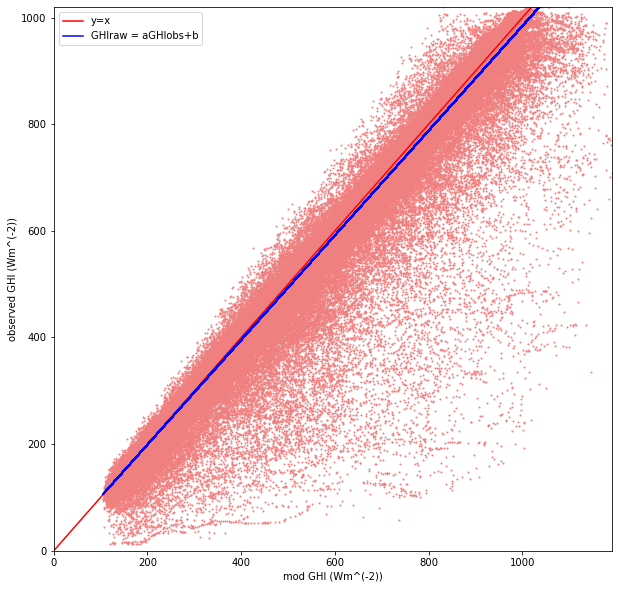

In [6]:
#clear weather conditions 
x1='clr'
x11='clr2'
y1=clear['GHIraw']
z1=clear['GHIobs']

c1='clear'
r1='lightcoral'

p1,p11 = graph(z1,y1,r1,c1)
MBE(x1,y1,z1,c1)
RMSE(x11,y1,z1,c1)
R(y1,z1,c1)

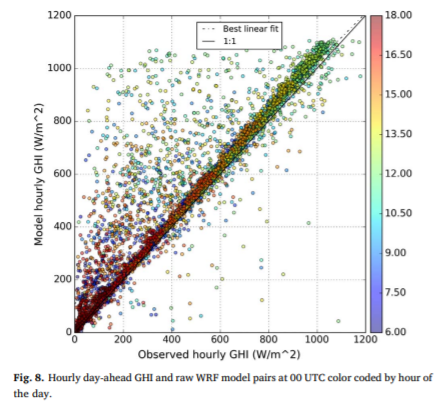

for intermediate weather conditions
*slope (a) is: [[1.14972483]]
*intercept(b) is [28.24778304]
the MBE index for the intermediate conditions is: 10.419590634533211
the RMSE index for the intermediate conditions is: 56.62689786017935
the R index for the intermediate conditions is: 0.8142533897166538


0.8142533897166538

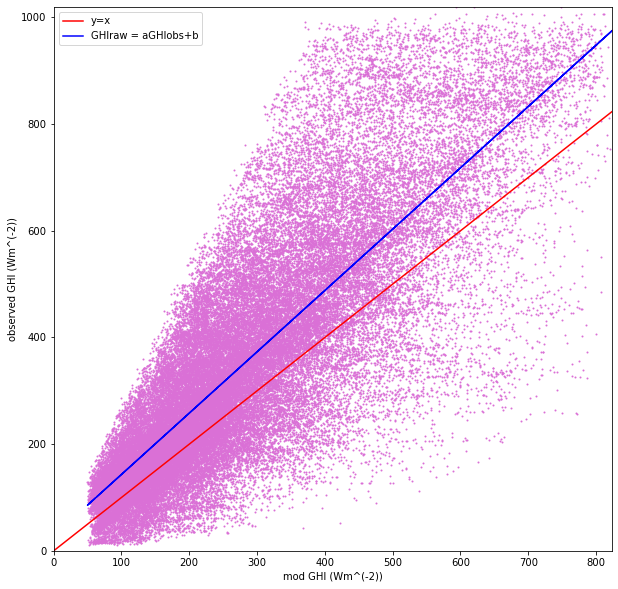

In [7]:
#intermediate weather conditions 
x2='int'
x22='int2'
y2=intermediate['GHIraw']
z2=intermediate['GHIobs']

c2='intermediate'
r2='orchid'

p2,p22 = graph(z2,y2,r2,c2)
MBE(x2,y2,z2,c2)
RMSE(x22,y2,z2,c2)
R(y2,z2,c2)

for cloudy weather conditions
*slope (a) is: [[1.58052854]]
*intercept(b) is [33.75665189]
the MBE index for the cloudy conditions is: 10.666448554292954
the RMSE index for the cloudy conditions is: 55.20423858551945
the R index for the cloudy conditions is: 0.6800137826364004


0.6800137826364004

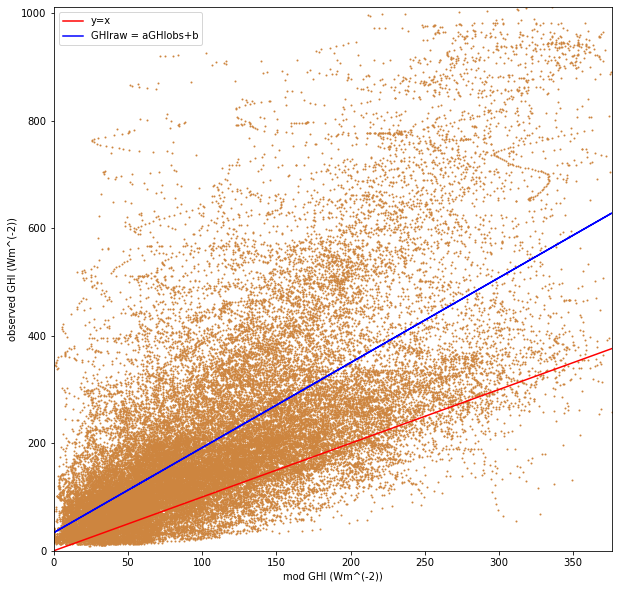

In [8]:
#cloudy weather conditions 
x3='cld'
x33='cld2'
y3=cloudy['GHIraw']
z3=cloudy['GHIobs']

c3='cloudy'
r3='peru'

p3,p33 = graph(z3,y3,r3,c3)
MBE(x3,y3,z3,c3)
RMSE(x33,y3,z3,c3)
R(y3,z3,c3)

In [9]:
#is the kt_1 index okay for the cloudy conditions?
print(cloudy[['timestamp','GHIobs','GHIraw','kt','kt_1']].head(15))

                timestamp     GHIobs   GHIraw        kt      kt_1
14   2019-01-01T07:12:00Z  66.571981   90.000  0.221942  0.299512
438  2019-01-02T06:58:00Z  39.191831  152.730  0.156503  0.222116
877  2019-01-03T06:58:00Z   1.241005   22.482  0.004956  0.007033
878  2019-01-03T06:59:00Z   1.278386   22.242  0.005032  0.007113
889  2019-01-03T07:10:00Z   2.055013   17.874  0.007011  0.009522
891  2019-01-03T07:12:00Z   3.136635   19.344  0.010454  0.014107
892  2019-01-03T07:13:00Z   4.004433   20.190  0.013194  0.017749
893  2019-01-03T07:14:00Z   4.964095   21.054  0.016173  0.021689
894  2019-01-03T07:15:00Z   5.608336   21.936  0.018070  0.024160
895  2019-01-03T07:16:00Z   5.865494   22.830  0.018693  0.024918
896  2019-01-03T07:17:00Z   5.750725   23.742  0.018130  0.024098
897  2019-01-03T07:18:00Z   5.305305   24.672  0.016549  0.021933
898  2019-01-03T07:19:00Z   5.343344   25.614  0.016493  0.021799
899  2019-01-03T07:20:00Z   5.981622   26.574  0.018274  0.024085
900  2019-

# Correction of mod values

In [10]:
#by now we have divided our dataframe to 3 different ones according to the weather conditions
clear 

,timestamp,GHIobs,GHIraw,TOA,sza,kt,h,m,kt_1
75,2019-01-01T08:13:00Z,280.098494,101.304,485.058,69.8456,0.577454,0.351761,2.879004,0.690174
76,2019-01-01T08:14:00Z,303.008111,102.042,487.638,69.7337,0.621379,0.353714,2.864025,0.741777
77,2019-01-01T08:15:00Z,322.162920,102.780,490.200,69.6224,0.657207,0.355656,2.849290,0.783612
78,2019-01-01T08:16:00Z,331.547972,103.518,492.750,69.5117,0.672852,0.357588,2.834793,0.801324
79,2019-01-01T08:17:00Z,338.123407,104.250,495.282,69.4016,0.682689,0.359510,2.820529,0.812097
...,...,...,...,...,...,...,...,...,...
446662,2020-12-31T13:02:00Z,372.732793,239.304,474.810,70.2890,0.785015,0.344022,2.940026,0.942854
446679,2020-12-31T13:19:00Z,291.647972,221.760,427.662,72.3149,0.681959,0.308663,3.257514,0.839566
446680,2020-12-31T13:20:00Z,261.273001,221.688,424.758,72.4391,0.615110,0.306496,3.279336,0.758520
446690,2020-12-31T13:30:00Z,288.905678,207.744,394.884,73.7099,0.731622,0.284316,3.521406,0.918552


# First method: LINEAR CORRECTION


In [11]:
# GHImod = aGHIobs + β : already calculated above (GHImod=GHIraw)
# GHImod,cor = GHImod - [(a-1)GHIobs +b]

GHIcclr = clear['GHIraw'] - ((p1[0][0] - 1)*clear['GHIobs'] +  p11)
GHIcint = intermediate['GHIraw'] - ((p2[0][0] - 1)*intermediate['GHIobs'] +  p22)
GHIccld = cloudy['GHIraw'] - ((p3[0][0] - 1)*cloudy['GHIobs'] +  p33)


In [12]:
#GHIcclr[GHIcclr<0] = 0
#GHIcint[GHIcint<0] = 0
#GHIccld[GHIccld<0] = 0

### GHImod,cor = a'GHImod + b' : προσδιορισμός των α', β'

for clear weather conditions
*slope (a) is: [[1.]]
*intercept(b) is [-4.32009983e-12]
the MBE index for the clear conditions is: 1.3864279537250589e-13
the RMSE index for the clear conditions is: 48.27515972538156
the R index for the clear conditions is: 0.9738942545309546


0.9738942545309546

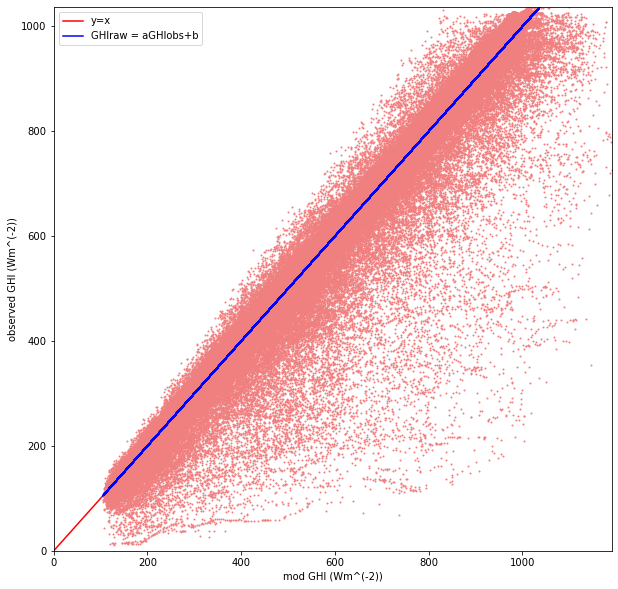

In [13]:
#corrected clear conditions
cx1 = 'cclr'
cx11 = 'cclr2'
cy1 = GHIcclr
cz1 = clear['GHIobs']

#c1, r1 same as before

graph(cz1,cy1,r1,c1)
MBE(cx1, cy1, cz1, c1)
RMSE(cx11,cy1,cz1,c1)
R(cy1,cz1,c1)

for intermediate weather conditions
*slope (a) is: [[1.]]
*intercept(b) is [-5.68434189e-14]
the MBE index for the intermediate conditions is: -1.1742902257101525e-14
the RMSE index for the intermediate conditions is: 48.9246364835566
the R index for the intermediate conditions is: 0.7733895376694554


0.7733895376694554

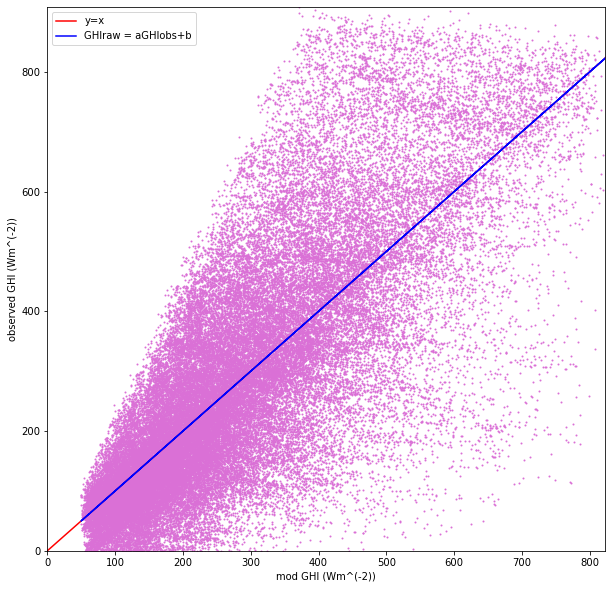

In [14]:
#corrected intermediate conditions
cx2 = 'cint'
cx22 = 'cint2'
cy2 = GHIcint
cz2 = intermediate['GHIobs']

graph(cz2,cy2,r2,c2)
MBE(cx2, cy2, cz2, c2)
RMSE(cx22,cy2,cz2,c2)
R(cy2,cz2,c2)

for cloudy weather conditions
*slope (a) is: [[1.]]
*intercept(b) is [9.9475983e-14]
the MBE index for the cloudy conditions is: -2.9642277542198024e-15
the RMSE index for the cloudy conditions is: 42.239468929617026
the R index for the cloudy conditions is: 0.5061029424612975


0.5061029424612975

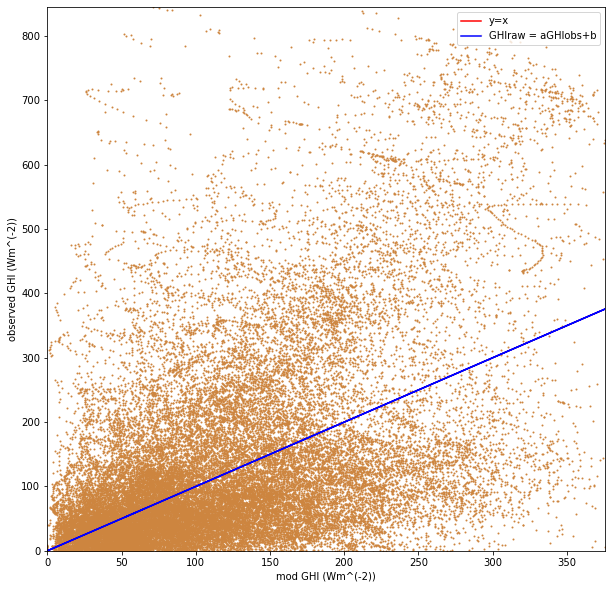

In [15]:
#corrected cloudy conditions
cx3 = 'ccld'
cx33 = 'ccld2'
cy3 = GHIccld
cz3 = cloudy['GHIobs']


graph(cz3,cy3,r3,c3)
MBE(cx3, cy3, cz3, c3)
RMSE(cx33,cy3,cz3,c3)
R(cy3,cz3,c3)

### Σύγκριση αρχικών data με διορθωμένα data για τις cloudy συνθήκες

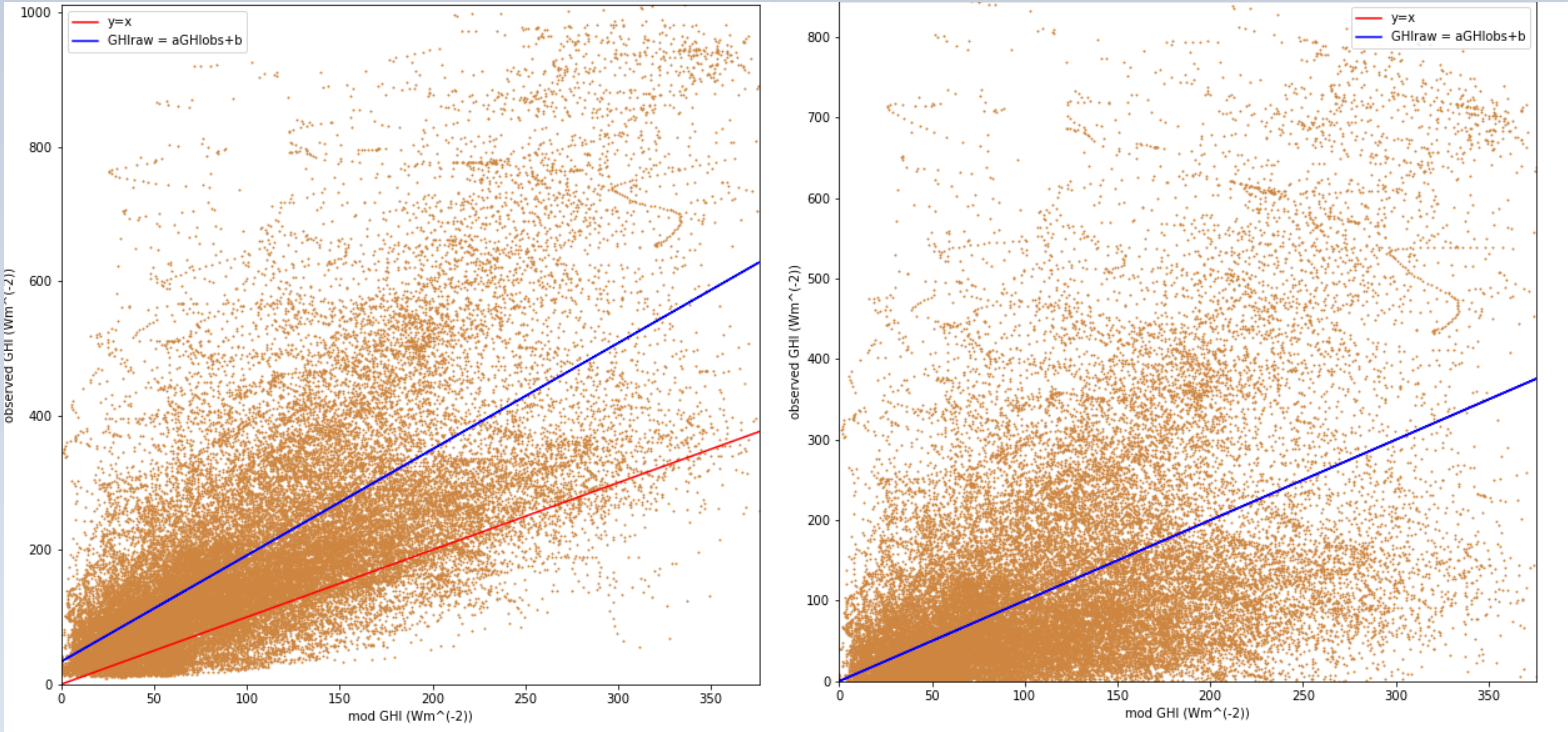

In [16]:
data.head(100)

,timestamp,GHIobs,GHIraw,TOA,sza,kt,h,m,kt_1,clr,...,int,int2,cld,cld2,cclr,cclr2,cint,cint2,ccld,ccld2
0,2019-01-01T06:58:00Z,64.056280,39.696,250.560,79.7477,0.255652,0.178936,5.452219,0.362773,NaN,...,-24.360280,593.423262,NaN,NaN,NaN,NaN,-62.198879,3868.700592,NaN,NaN
1,2019-01-01T06:59:00Z,64.580127,42.480,254.166,79.5986,0.254086,0.181539,5.379213,0.359094,NaN,...,-22.100127,488.415634,NaN,NaN,NaN,NaN,-60.017159,3602.059411,NaN,NaN
2,2019-01-01T07:00:00Z,65.055307,45.342,257.760,79.4499,0.252387,0.184134,5.308312,0.355280,NaN,...,-19.713307,388.614476,NaN,NaN,NaN,NaN,-57.701485,3329.461382,NaN,NaN
3,2019-01-01T07:01:00Z,65.915272,48.276,261.336,79.3017,0.252224,0.186721,5.239476,0.353672,NaN,...,-17.639272,311.143927,NaN,NaN,NaN,NaN,-55.756208,3108.754785,NaN,NaN
4,2019-01-01T07:02:00Z,66.664090,51.288,264.906,79.1538,0.251652,0.189302,5.172529,0.351524,NaN,...,-15.376090,236.424155,NaN,NaN,NaN,NaN,-53.605143,2873.511380,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2019-01-01T08:33:00Z,423.028853,176.268,533.622,67.7255,0.792750,0.388763,2.620854,0.927580,-246.760853,...,NaN,NaN,NaN,NaN,-241.795072,58464.856641,NaN,NaN,NaN,NaN
96,2019-01-01T08:34:00Z,421.308922,185.010,535.878,67.6262,0.786203,0.390496,2.609968,0.919077,-236.298922,...,NaN,NaN,NaN,NaN,-231.364990,53529.758630,NaN,NaN,NaN,NaN
97,2019-01-01T08:35:00Z,420.132445,193.818,538.116,67.5276,0.780747,0.392217,2.599256,0.911876,-226.314445,...,NaN,NaN,NaN,NaN,-221.402298,49018.977644,NaN,NaN,NaN,NaN
98,2019-01-01T08:36:00Z,419.727926,202.698,540.336,67.4296,0.776791,0.393928,2.588702,0.906447,-217.029926,...,NaN,NaN,NaN,NaN,-212.125270,44997.130083,NaN,NaN,NaN,NaN


   # Second method: EQM (empirical quantile mapping)

In [17]:
num = list(np.arange(0,100,0.5))

In [18]:
#calculating the percentiles for the module and the observed values for all weather conditions

clobper = np.percentile(clear['GHIobs'],num)
clrawper = np.percentile(clear['GHIraw'],num)

inobper = np.percentile(intermediate['GHIobs'],num)
inrawper = np.percentile(intermediate['GHIraw'],num)

cdobper = np.percentile(cloudy['GHIobs'],num)
cdrawper = np.percentile(cloudy['GHIraw'],num)

### initial visualization of the data

In [19]:
#plot2 function for the percentiles of mod and obs values
def graph2(obper,rawper):
    plt.figure(figsize=(10,10))
    plt.ylabel("percentile (100%)")
    plt.xlabel("GHI (W/m^2)")
    plt.plot(obper, num, color='red', label = "obs")
    plt.plot(rawper, num,color='pink',label = "mod")
    plt.legend()
    plt.show()

for the clear weather conditions


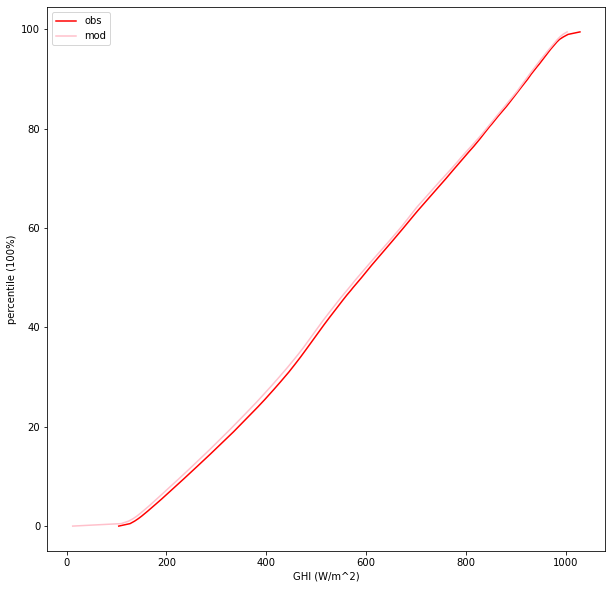

In [20]:
print("for the clear weather conditions")
graph2(clobper,clrawper)

for the intermediate weather conditions


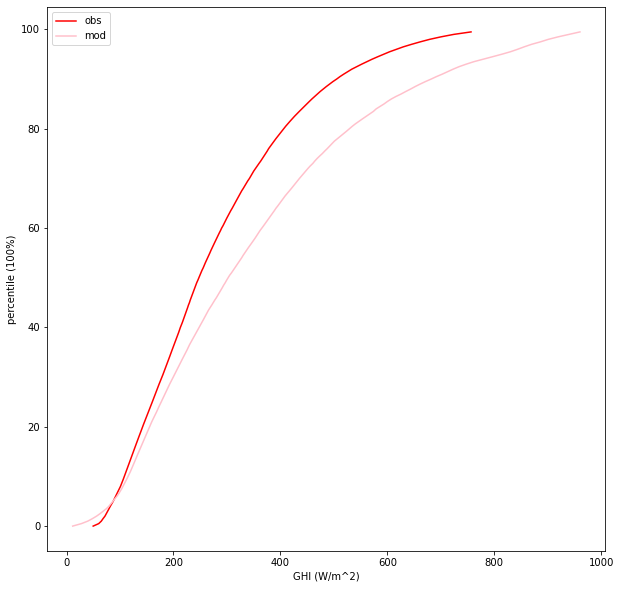

In [21]:
print("for the intermediate weather conditions")
graph2(inobper,inrawper)

for the cloudy weather conditions


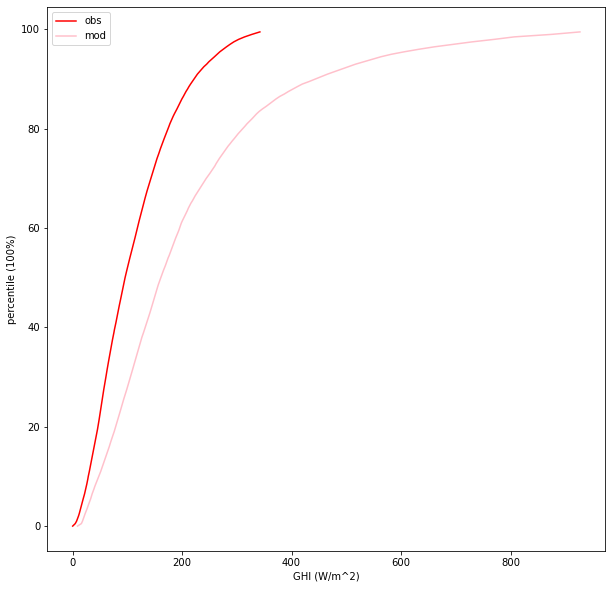

In [22]:
print("for the cloudy weather conditions")
graph2(cdobper,cdrawper)

### linear interpolation

In [23]:
# linear interpolation function

def nef(x,xp,fp):
    
    num = list(np.arange(0,100,0.5))
    plt.figure(figsize=(10,10))
    plt.plot(xp,num , '-', color='red', markersize=1, label = "obs")
    plt.plot(fp,num , '-', color='pink', markersize=1 , label = "mod")
    plt.xlabel('GHI (Wm^(-2))')
    plt.ylabel(' percentile')
    plt.ylim(bottom=0, top=100)
    plt.xlim(left=0, right = max(xp))
    
    f = np.interp(x, xp, fp)
    fper=np.percentile(f,num)
    plt.plot(fper,num, '-', color = 'green',markersize=1, label = "after CDF")
    plt.legend()
    
    return f 

In [24]:
# 2os tropos gia errors
#MBEclr = np.mean(n1 - clear['GHIraw'])
#print("the MBE index for the clear conditions is:", MBEclr)
#RMSEclr = np.sqrt(((n1 - clear['GHIraw']) ** 2).mean())
#print("the RMSE index for the clear conditions is:",RMSEclr)

the MBE index for the clear conditions is: -11.46026902790018
the RMSE index for the clear conditions is: 51.42377951242945
the R index for the clear conditions is: 0.9722453435590801


0.9722453435590801

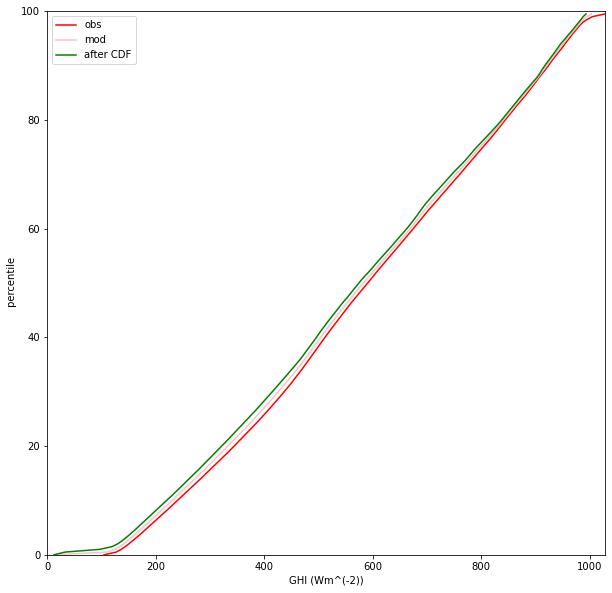

In [25]:
#clear weather
n1 = nef(clear['GHIraw'],clobper,clrawper)

MBE("CLR",n1,clear['GHIobs'],'clear')
RMSE("CLR",n1,clear['GHIobs'],'clear')
R(n1,clear['GHIobs'],'clear')

the MBE index for the intermediate conditions is: 23.105572000943006
the RMSE index for the intermediate conditions is: 91.15984469584852
the R index for the intermediate conditions is: 0.807208576740231


0.807208576740231

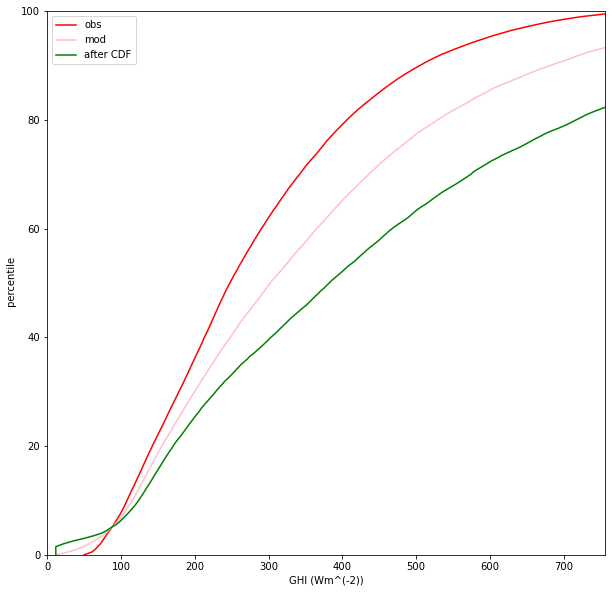

In [26]:
#intermediate weather conditions

n2 = nef(intermediate['GHIraw'],inobper,inrawper)

MBE("INT",n2,intermediate['GHIobs'],'intermediate')
RMSE("INT",n2,intermediate['GHIobs'],'intermediate')
R(n2,intermediate['GHIobs'],'intermediate')

the MBE index for the cloudy conditions is: 30.822316340564466
the RMSE index for the cloudy conditions is: 127.01827365513208
the R index for the cloudy conditions is: 0.681506236548108


0.681506236548108

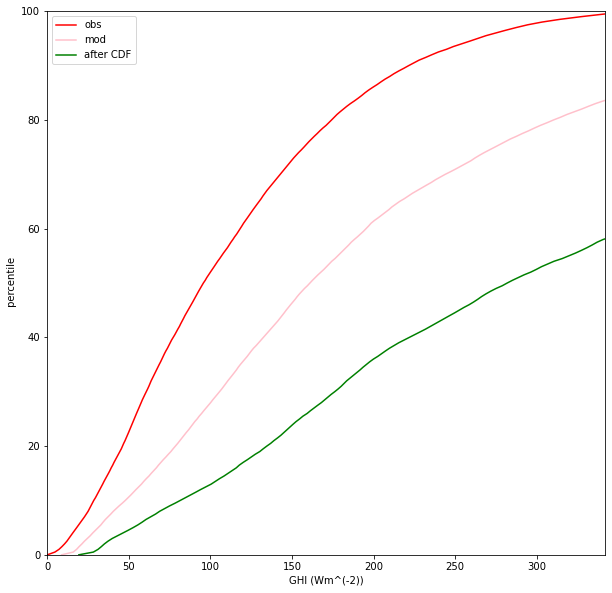

In [27]:
#cloudy weather conditions

n3 = nef(cloudy['GHIraw'],cdobper,cdrawper)

MBE("CLD",n3,cloudy['GHIobs'],'cloudy')
RMSE("CLD",n3,cloudy['GHIobs'],'cloudy')
R(n3,cloudy['GHIobs'],'cloudy')

# APPLICATION OF DATA CORRECTION 

In [28]:
dt = pd.read_csv(r'C:\Users\nadia\OneDrive\Desktop\thesis\data\Solar_data_2015_2019_1min.csv')
dt

,timestamp,GHIobs,GHIraw,TOA,zen
0,2015-01-01T00:00:00Z,0.0,0.0,0.0,156.554
1,2015-01-01T00:01:00Z,0.0,0.0,0.0,156.392
2,2015-01-01T00:02:00Z,0.0,0.0,0.0,156.229
3,2015-01-01T00:03:00Z,0.0,0.0,0.0,156.066
4,2015-01-01T00:04:00Z,0.0,0.0,0.0,155.902
...,...,...,...,...,...
2103835,2018-12-31T23:55:00Z,0.0,0.0,0.0,157.351
2103836,2018-12-31T23:56:00Z,0.0,0.0,0.0,157.193
2103837,2018-12-31T23:57:00Z,0.0,0.0,0.0,157.034
2103838,2018-12-31T23:58:00Z,0.0,0.0,0.0,156.875


In [29]:
#add colums to our dataframe
dt['kt'] = dt['GHIobs']/ dt['TOA']
dt['h']= np.radians(90 - dt['zen'])
dt['m']= (np.sin(dt['h']) + 0.15 * (np.degrees(dt['h']) + 3.885)**(-1.253))**(-1)
dt['kt_1']= dt['kt']/(1.031 * np.exp(-1.4/(0.9+ 9.4/dt['m'])) + 0.1)


#divide dataframe according to weather conditions (ανοιχτό διάστημα προς τα αριστερά)
clear1 = dt[dt['GHIraw'].gt(0) & dt['kt_1'].between(0.65,10,inclusive='right')] 
intermediate1 = dt[dt['GHIraw'].gt(0) & dt['kt_1'].between(0.30,0.65,inclusive='right')]  
cloudy1 = dt[dt['GHIraw'].gt(0) & dt['kt_1'].between(0.00,0.30,inclusive='right')]

In [30]:
clear1


,timestamp,GHIobs,GHIraw,TOA,zen,kt,h,m,kt_1
358,2015-01-01T05:58:00Z,4.715679,4.044,16.356,89.504,0.288315,0.008657,31.038488,0.683299
430,2015-01-01T07:10:00Z,157.404983,180.636,293.040,78.131,0.537145,0.207153,4.752523,0.731951
433,2015-01-01T07:13:00Z,192.873812,188.934,303.390,77.698,0.635729,0.214710,4.594618,0.857924
461,2015-01-01T07:41:00Z,264.970104,263.910,394.458,73.859,0.671732,0.281714,3.552257,0.845253
473,2015-01-01T07:53:00Z,346.546813,294.120,430.206,72.331,0.805537,0.308382,3.260326,0.991915
...,...,...,...,...,...,...,...,...,...
2101865,2018-12-30T15:05:00Z,22.321900,9.666,45.486,87.979,0.490742,0.035273,19.428333,1.033408
2101866,2018-12-30T15:06:00Z,20.758401,8.244,41.388,88.145,0.501556,0.032376,20.339675,1.069667
2101867,2018-12-30T15:07:00Z,19.185713,6.942,37.284,88.312,0.514583,0.029461,21.328937,1.111704
2101868,2018-12-30T15:08:00Z,17.272908,5.754,33.174,88.479,0.520676,0.026546,22.397269,1.139605


In [31]:
#ymod,cor = a* ymod + b*

GHImodcorclr = p1[0][0]*clear1['GHIraw'] + p11
GHImodcorint = p2[0][0]*intermediate1['GHIraw'] + p22
GHImodcorcld = p3[0][0]*cloudy1['GHIraw'] + p33

### Errors

In [43]:
#clear weather conditions
MBE("CLR18",clear1['GHIraw'],clear1['GHIobs'],'clear')
RMSE("CLR18",clear1['GHIraw'],clear1['GHIobs'],'clear')
R(clear1['GHIraw'],clear1['GHIobs'],'clear')

the MBE index for the clear conditions is: -2.0046792163548863
the RMSE index for the clear conditions is: 29.630694712208793
the R index for the clear conditions is: 0.9850517023125714


0.9850517023125714

In [45]:
#intermediate weather conditions
MBE("INT18",intermediate1['GHIraw'],intermediate1['GHIobs'],'intermediate')
RMSE("INT18",intermediate1['GHIraw'],intermediate1['GHIobs'],'intermediate')
R(intermediate1['GHIraw'],intermediate1['GHIobs'],'intermediate')

the MBE index for the intermediate conditions is: 7.374325367348922
the RMSE index for the intermediate conditions is: 45.78295619006285
the R index for the intermediate conditions is: 0.9032759140625379


0.9032759140625379

In [44]:
#cloudy weather conditions
MBE("CLD18",cloudy1['GHIraw'],cloudy1['GHIobs'],'cloudy')
RMSE("CLD18",cloudy1['GHIraw'],cloudy1['GHIobs'],'cloudy')
R(cloudy1['GHIraw'],cloudy1['GHIobs'],'cloudy')

the MBE index for the cloudy conditions is: 6.100352007214745
the RMSE index for the cloudy conditions is: 43.21059339902901
the R index for the cloudy conditions is: 0.74371029484084


0.74371029484084

# LINEAR

In [48]:
def lincor(ymod,ymodcor,col,cond):
    
    plt.figure(figsize=(10,10))
    plt.plot(ymod, ymodcor, "ro", color= col, markersize=1)
    
    #plt.plot([0,1200],[0,1200],color='red', markersize=0.05)
    
    plt.xlabel("ymod GHI 2015-2018 (Wm^(-2))")
    plt.ylabel("ymodcorr GHI 2019-2020 (Wm^(-2))")
    plt.ylim(bottom=0,top=max(ymodcor))
    plt.xlim(left =0, right = max(ymod))
    
    model = LinearRegression().fit(ymod.values.reshape(-1,1), ymodcor.values.reshape((-1, 1)))
    yn = (model.coef_[0][0])*ymodcor + (model.intercept_)
    plt.plot(ymod, yn, 'ro', color= 'blue', markersize=0.05)
    
    print('for', cond ,'weather conditions')
    print('slope (a*) is:', model.coef_)
    print('intercept(b*) is',model.intercept_)
    
    return (model.coef_,model.intercept_)
    

for clear weather conditions
slope (a*) is: [[0.98148241]]
intercept(b*) is [2.86769278]
the MBE index for the clear conditions is: -4.095072479210271
the RMSE index for the clear conditions is: 170.1624423534765
the R index for the clear conditions is: 0.03562463763587475


0.03562463763587475

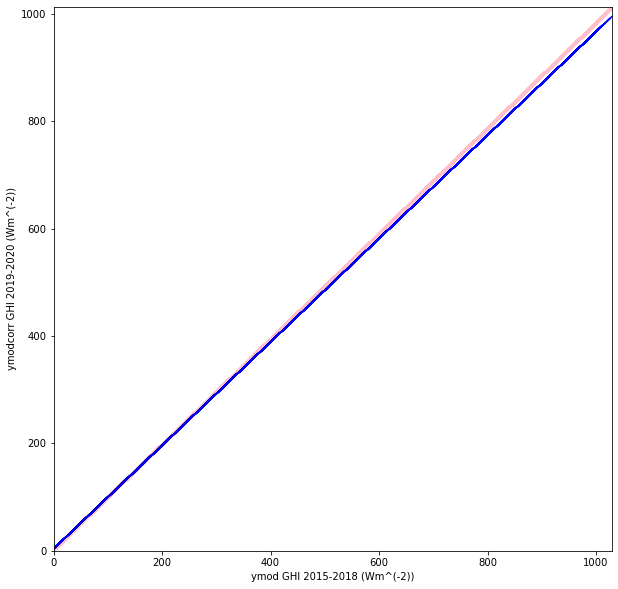

In [51]:
a1,b1=lincor(clear1['GHIraw'],GHImodcorclr,'pink','clear')
MBE("CLRL",clear1['GHIraw'],clear['GHIraw'],'clear')
RMSE("CLRL",clear1['GHIraw'],clear['GHIraw'],'clear')
R(clear1['GHIraw'],clear['GHIraw'],'clear')

In [ ]:
παιρνω α1, β1 και ymodnew = a1*ymod+b1
kai ymodnew=yobs? 

In [53]:
ymodnew=a1[0][0]*clear1['GHIraw']+b1

for clear weather conditions
slope (a*) is: [[0.98148241]]
intercept(b*) is [2.86769278]


(array([[0.98148241]]), array([2.86769278]))

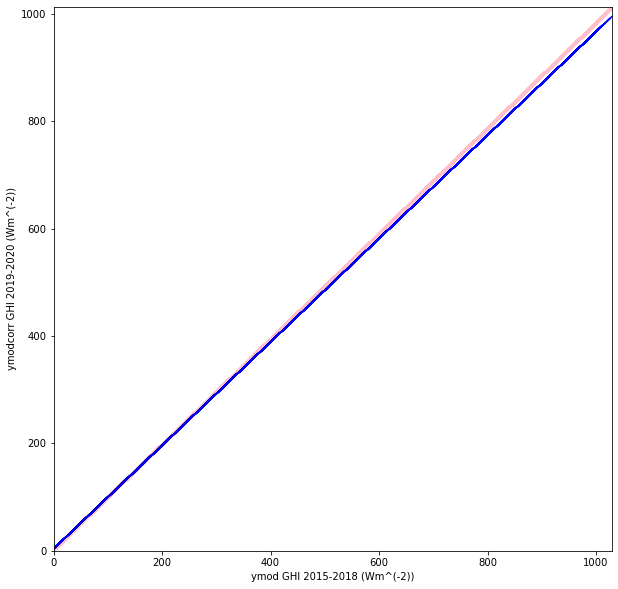

In [54]:
lincor(clear1['GHIraw'],ymodnew,'pink','clear')

for intermediate weather conditions
slope (a*) is: [[1.14972483]]
intercept(b*) is [28.24778304]
the MBE index for the intermediate conditions is: -69.06614456616389
the RMSE index for the intermediate conditions is: 78.14674005252512
the R index for the intermediate conditions is: 0.9999999999999998


0.9999999999999998

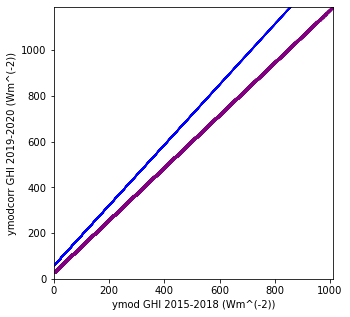

In [217]:
lincor(intermediate1['GHIraw'],GHIrawcorint,'purple','intermediate')
MBE2(intermediate1['GHIraw'],GHIrawcorint,'intermediate')
RMSE2(intermediate1['GHIraw'],GHIrawcorint,'intermediate')
R(intermediate1['GHIraw'],GHIrawcorint,'intermediate')

for cloudy weather conditions
slope (a*) is: [[1.58052854]]
intercept(b*) is [33.75665189]
the MBE index for the cloudy conditions is: -138.01875847377423
the RMSE index for the cloudy conditions is: 173.61547132936713
the R index for the cloudy conditions is: 0.9999999999999999


0.9999999999999999

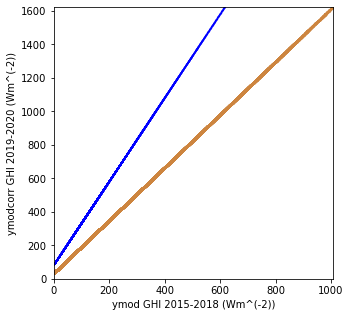

In [218]:
lincor(cloudy1['GHIraw'],GHIrawcorcld,'peru','cloudy')
MBE2(cloudy1['GHIraw'],GHIrawcorcld,'cloudy')
RMSE2(cloudy1['GHIraw'],GHIrawcorcld,'cloudy')
R(cloudy1['GHIraw'],GHIrawcorcld,'cloudy')

# EQM

the MBE index for the clear conditions is: -5.38617676708247
the RMSE index for the clear conditions is: 32.26130738822731
the R index for the clear conditions is: 0.9842003185143011


0.9842003185143011

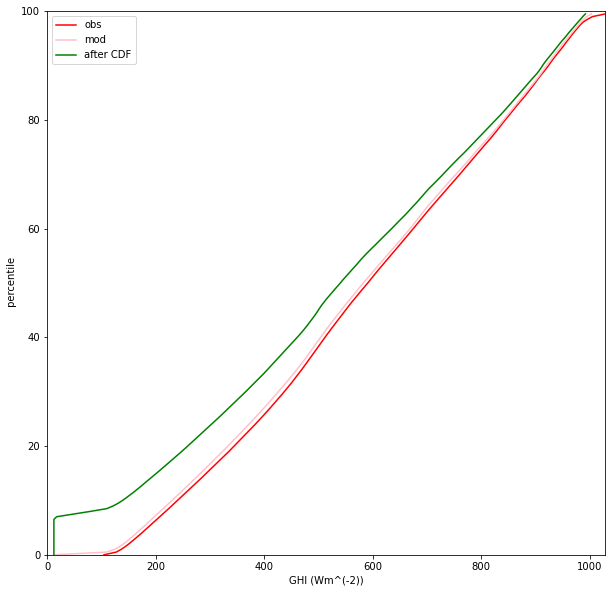

In [46]:
n11 = nef(clear1['GHIraw'],clobper,clrawper)
MBE("CLR1",n11,clear1['GHIobs'],'clear')
RMSE("CLR1",n11,clear1['GHIobs'],'clear')
R(n11,clear1['GHIobs'],'clear')

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(n11,clear1['GHIraw'],"ro")

the MBE index for the intermediate conditions is: 13.983316906047893
the RMSE index for the intermediate conditions is: 73.45775412652496
the R index for the intermediate conditions is: 0.9014659981053983


0.9014659981053983

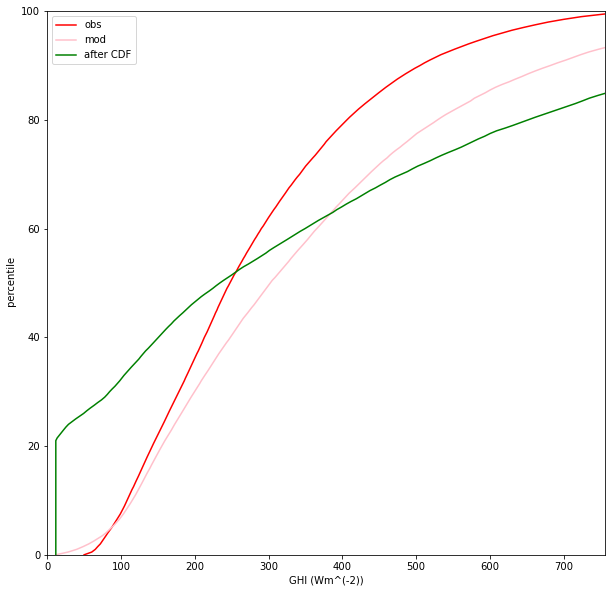

In [47]:
n22 = nef(intermediate1['GHIraw'],inobper,inrawper)
MBE("INT1",n22,intermediate1['GHIobs'],'intermediate')
RMSE("INT1",n22,intermediate1['GHIobs'],'intermediate')
R(n22,intermediate1['GHIobs'],'intermediate')

the MBE index for the cloudy conditions is: 15.83394874810634
the RMSE index for the cloudy conditions is: 91.74309475947739
the R index for the cloudy conditions is: 0.7464718552015934


0.7464718552015934

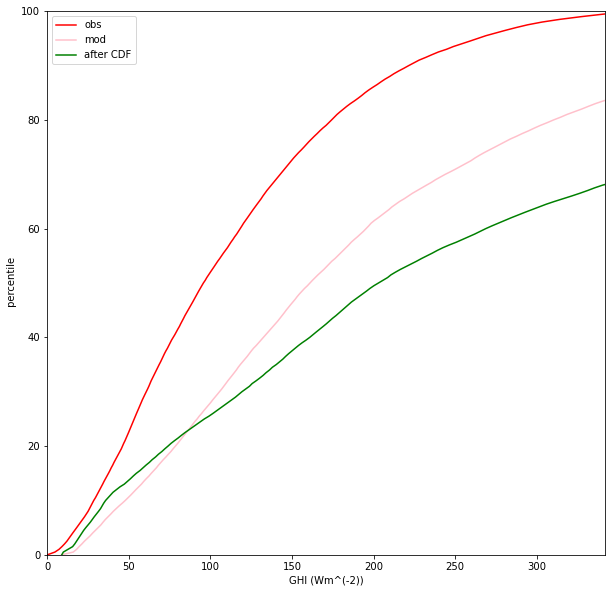

In [39]:
n33 = nef(cloudy1['GHIraw'],cdobper,cdrawper)
MBE("CLD1",n33,cloudy1['GHIobs'],'cloudy')
RMSE("CLD1",n33,cloudy1['GHIobs'],'cloudy')
R(n33,cloudy1['GHIobs'],'cloudy')